## Modules

In [1]:

import numpy as np
import pandas as pd


import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display

from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
import os

dataset_folder = './Dataset'  

paths = []
labels = []


for dirname, _, filenames in os.walk(dataset_folder):
    for filename in filenames:
        if filename.endswith('.wav'):
            # Collect full path of each .wav file
            paths.append(os.path.join(dirname, filename))
            
            print(filename)
            
            
            #label = os.path.basename(dirname)  
            #labels.append(label.lower())

            label = filename.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())

        

print(f"Dataset is loaded with {len(paths)} .wav files.")
#print(paths[:5])  


OAF_back_angry.wav
OAF_bar_angry.wav
OAF_base_angry.wav
OAF_bath_angry.wav
OAF_bean_angry.wav
OAF_beg_angry.wav
OAF_bite_angry.wav
OAF_boat_angry.wav
OAF_bone_angry.wav
OAF_book_angry.wav
OAF_bought_angry.wav
OAF_burn_angry.wav
OAF_cab_angry.wav
OAF_calm_angry.wav
OAF_came_angry.wav
OAF_cause_angry.wav
OAF_chain_angry.wav
OAF_chair_angry.wav
OAF_chalk_angry.wav
OAF_chat_angry.wav
OAF_check_angry.wav
OAF_cheek_angry.wav
OAF_chief_angry.wav
OAF_choice_angry.wav
OAF_cool_angry.wav
OAF_dab_angry.wav
OAF_date_angry.wav
OAF_dead_angry.wav
OAF_death_angry.wav
OAF_deep_angry.wav
OAF_dime_angry.wav
OAF_dip_angry.wav
OAF_ditch_angry.wav
OAF_dodge_angry.wav
OAF_dog_angry.wav
OAF_doll_angry.wav
OAF_door_angry.wav
OAF_fail_angry.wav
OAF_fall_angry.wav
OAF_far_angry.wav
OAF_fat_angry.wav
OAF_fit_angry.wav
OAF_five_angry.wav
OAF_food_angry.wav
OAF_gap_angry.wav
OAF_gas_angry.wav
OAF_gaze_angry.wav
OAF_germ_angry.wav
OAF_get_angry.wav
OAF_gin_angry.wav
OAF_goal_angry.wav
OAF_good_angry.wav
OAF_goose_a

In [3]:
len(paths)

5600

In [4]:
#paths[:5]
print(paths)

['./Dataset\\OAF_angry\\OAF_back_angry.wav', './Dataset\\OAF_angry\\OAF_bar_angry.wav', './Dataset\\OAF_angry\\OAF_base_angry.wav', './Dataset\\OAF_angry\\OAF_bath_angry.wav', './Dataset\\OAF_angry\\OAF_bean_angry.wav', './Dataset\\OAF_angry\\OAF_beg_angry.wav', './Dataset\\OAF_angry\\OAF_bite_angry.wav', './Dataset\\OAF_angry\\OAF_boat_angry.wav', './Dataset\\OAF_angry\\OAF_bone_angry.wav', './Dataset\\OAF_angry\\OAF_book_angry.wav', './Dataset\\OAF_angry\\OAF_bought_angry.wav', './Dataset\\OAF_angry\\OAF_burn_angry.wav', './Dataset\\OAF_angry\\OAF_cab_angry.wav', './Dataset\\OAF_angry\\OAF_calm_angry.wav', './Dataset\\OAF_angry\\OAF_came_angry.wav', './Dataset\\OAF_angry\\OAF_cause_angry.wav', './Dataset\\OAF_angry\\OAF_chain_angry.wav', './Dataset\\OAF_angry\\OAF_chair_angry.wav', './Dataset\\OAF_angry\\OAF_chalk_angry.wav', './Dataset\\OAF_angry\\OAF_chat_angry.wav', './Dataset\\OAF_angry\\OAF_check_angry.wav', './Dataset\\OAF_angry\\OAF_cheek_angry.wav', './Dataset\\OAF_angry\\OAF

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
# Creating a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,./Dataset\OAF_angry\OAF_back_angry.wav,angry
1,./Dataset\OAF_angry\OAF_bar_angry.wav,angry
2,./Dataset\OAF_angry\OAF_base_angry.wav,angry
3,./Dataset\OAF_angry\OAF_bath_angry.wav,angry
4,./Dataset\OAF_angry\OAF_bean_angry.wav,angry


In [7]:
df['label'].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

# Data Analysis

<Axes: xlabel='label', ylabel='count'>

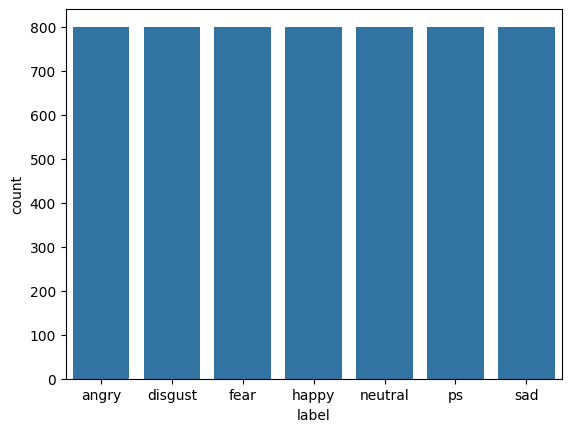

In [8]:
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

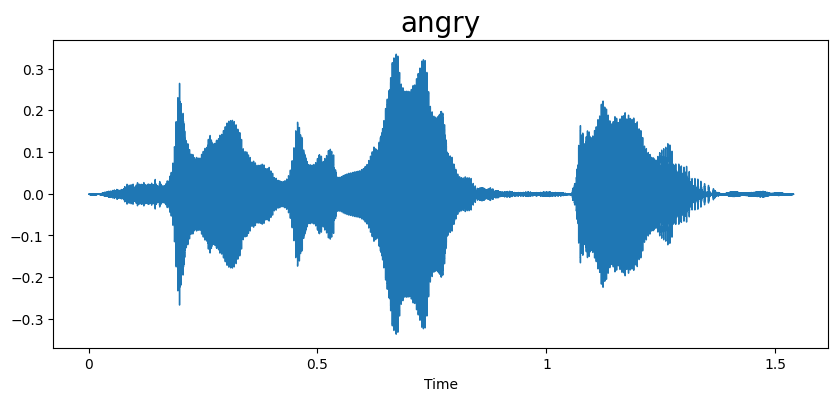

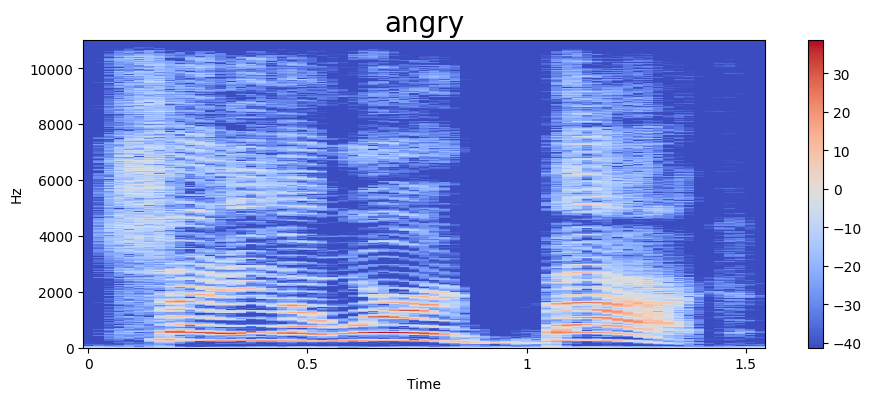

In [10]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [11]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [12]:
extract_mfcc(df['speech'][0])
#print(df['speech'][0])

array([-3.9698630e+02,  7.7440544e+01, -1.9592793e+01, -2.1666689e+01,
       -2.1127563e+00,  1.0075363e+01, -2.0366709e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736595e-01, -1.8325537e+00,  2.0210202e-01,
        7.2755092e-01,  1.3177378e+00,  2.8863375e+00,  2.8557916e+00,
       -4.7129192e+00, -4.4365101e+00, -1.6211587e+00, -1.0239840e+01,
       -7.5512633e+00, -1.7968794e+00, -7.0376520e+00,  9.4365845e+00,
        8.3558540e+00,  2.1712360e+01,  1.9216990e+01,  2.0348928e+01,
        1.3413368e+01,  8.3391733e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687399e+00,  5.4548688e+00,  2.5099635e+00, -1.8239068e+00,
        4.8689623e+00,  9.3139238e+00,  2.0891497e+00, -1.9064908e+00],
      dtype=float32)

In [13]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [14]:
X_mfcc

0       [-396.9863, 77.440544, -19.592793, -21.666689,...
1       [-465.73267, 98.77373, 0.65600836, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550478, -0.21709459,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.577072, -...
5599    [-421.8341, 70.69788, 32.47639, 45.642555, 4.7...
Name: speech, Length: 5600, dtype: object

In [15]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [16]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [17]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [18]:
y = y.toarray()

In [19]:
y.shape

(5600, 7)

# Spliting the Dataset 

In [21]:
from sklearn.model_selection import train_test_split

#  80% - training and 20% - testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (4480, 40, 1), (4480, 7)
Testing set shape: (1120, 40, 1), (1120, 7)


# Creating a Model

In [22]:
#Create the LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

#  LSTM model
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(40, 1)),  
    Dropout(0.4),  
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')  
])

#Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,511 (84.03 KB)

 Trainable params: 21,511 (84.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




checkpoint = ModelCheckpoint('emotion_model.keras', monitor='val_loss', save_best_only=True)


# Training
history = model.fit(
    X_train, y_train, 
    validation_split=0.2, 
    epochs=50, 
    batch_size=64, 
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2514 - loss: 1.8242 - val_accuracy: 0.6529 - val_loss: 1.0053
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6343 - loss: 0.9645 - val_accuracy: 0.8761 - val_loss: 0.3995
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8094 - loss: 0.5313 - val_accuracy: 0.9263 - val_loss: 0.2293
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8829 - loss: 0.3523 - val_accuracy: 0.9397 - val_loss: 0.1696
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9330 - loss: 0.2408 - val_accuracy: 0.9576 - val_loss: 0.1591
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9246 - loss: 0.2562 - val_accuracy: 0.9609 - val_loss: 0.1164
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9437 - loss: 0.1954 - val_accuracy: 0.9498 - val_loss: 0.1708
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9544 - loss: 0.1639 - val_accuracy: 0.9665 - v

In [24]:

from keras.models import load_model

model = load_model('emotion_model.keras')

# Evaluate 
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9738 - loss: 0.0651
Test Accuracy: 0.9777
Test Loss: 0.0570


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [26]:
import numpy as np

# Predict for the test set
y_pred = model.predict(X_test)


y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


from sklearn.metrics import accuracy_score
print(f'Accuracy Score: {accuracy_score(y_test_classes, y_pred_classes):.4f}')


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy Score: 0.9777
